In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font="IPAexGothic",style="white")

データを読み込む

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
print("Train:",train.shape, "Test:",test.shape) #Size

Train: (207, 12) Test: (40, 11)


データを見る

In [3]:
train.head(3)

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 12 columns):
datetime         207 non-null object
y                207 non-null int64
week             207 non-null object
soldout          207 non-null int64
name             207 non-null object
kcal             166 non-null float64
remarks          21 non-null object
event            14 non-null object
payday           10 non-null float64
weather          207 non-null object
precipitation    207 non-null object
temperature      207 non-null float64
dtypes: float64(3), int64(2), object(7)
memory usage: 19.5+ KB


In [5]:
train.describe(include="all")

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
count,207,207.000000,207,207.000000,207,166.000000,21,14,10.0,207,207,207.000000
unique,207,NaN,5,NaN,156,NaN,6,2,NaN,7,8,NaN
top,2014-6-3,NaN,水,NaN,タンドリーチキン,NaN,お楽しみメニュー,ママの会,NaN,曇,--,NaN
freq,1,NaN,43,NaN,6,NaN,12,9,NaN,53,169,NaN
mean,NaN,86.623188,NaN,0.449275,NaN,404.409639,NaN,NaN,1.0,NaN,NaN,19.252174
std,NaN,32.882448,NaN,0.498626,NaN,29.884641,NaN,NaN,0.0,NaN,NaN,8.611365
min,NaN,29.000000,NaN,0.000000,NaN,315.000000,NaN,NaN,1.0,NaN,NaN,1.200000
25%,NaN,57.000000,NaN,0.000000,NaN,386.000000,NaN,NaN,1.0,NaN,NaN,11.550000
50%,NaN,78.000000,NaN,0.000000,NaN,408.500000,NaN,NaN,1.0,NaN,NaN,19.800000
75%,NaN,113.000000,NaN,1.000000,NaN,426.000000,NaN,NaN,1.0,NaN,NaN,26.100000


In [6]:
test.describe(include="all")

,datetime,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
count,40,40,40.000000,40,36.000000,7,3,2.0,40,40,40.000000
unique,40,5,NaN,38,NaN,3,2,NaN,5,5,NaN
top,2014-10-3,水,NaN,ポークカレー,NaN,お楽しみメニュー,キャリアアップ支援セミナー,NaN,快晴,--,NaN
freq,1,9,NaN,2,NaN,4,2,NaN,12,31,NaN
mean,NaN,NaN,0.425000,NaN,421.083333,NaN,NaN,1.0,NaN,NaN,18.665000
std,NaN,NaN,0.500641,NaN,13.626392,NaN,NaN,0.0,NaN,NaN,4.401838
min,NaN,NaN,0.000000,NaN,396.000000,NaN,NaN,1.0,NaN,NaN,9.200000
25%,NaN,NaN,0.000000,NaN,411.500000,NaN,NaN,1.0,NaN,NaN,15.250000
50%,NaN,NaN,0.000000,NaN,420.000000,NaN,NaN,1.0,NaN,NaN,19.000000
75%,NaN,NaN,1.000000,NaN,428.500000,NaN,NaN,1.0,NaN,NaN,21.650000


下降トレンドがある

train datetime 2013-11-18 - 2014-9-9
test datetime 2014-10-1 - 2014-11-7


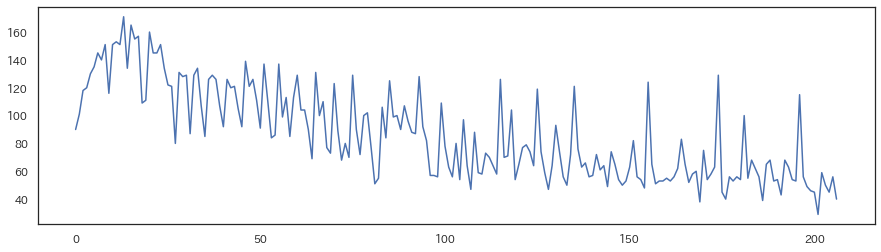

In [7]:
train.y.plot(x="datetime", figsize=(15,4))
print("train datetime",train.datetime.min(),"-",train.datetime.max())
print("test datetime",test.datetime.min(),"-",test.datetime.max())

初めの数十行は傾向が違うので落とす

In [8]:
train=train[30:] 
train['id'] = train.index.values - 30 #indexをid列としてキープ
train.index = pd.to_datetime(train.datetime) #datetime列をindexに設定

トレンド除去

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


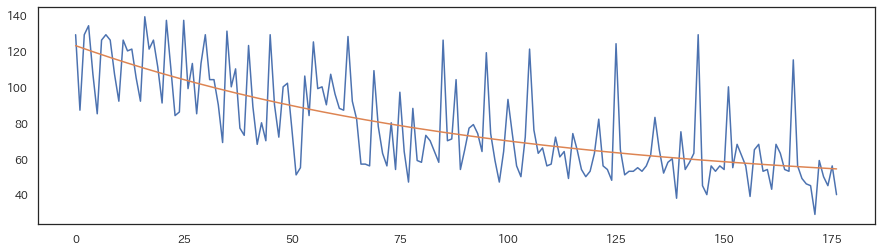

In [9]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

xs, ys = train.id.values, train.y.values 
#print(xs, ys)

popt, pcov = curve_fit(func, xs, ys)
a1, b1, c1 = popt
y_reg = a1 * np.exp(-b1 * xs) + c1

plt.figure(figsize=(15,4))
plt.plot(train.id, train.y)
plt.plot(y_reg)

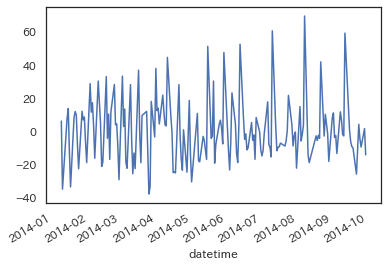

In [10]:
train['new_y']=train.y-y_reg
train['new_y'].plot()

月と日を特徴量として分ける

In [11]:
train["month"] = train.datetime.apply(lambda x : int(x.split("-")[1]))
train["day"] = train.datetime.apply(lambda x : int(x.split("-")[2]))

object列と販売数の相関を見る　→　曜日とお楽しみメニューが影響ありそう

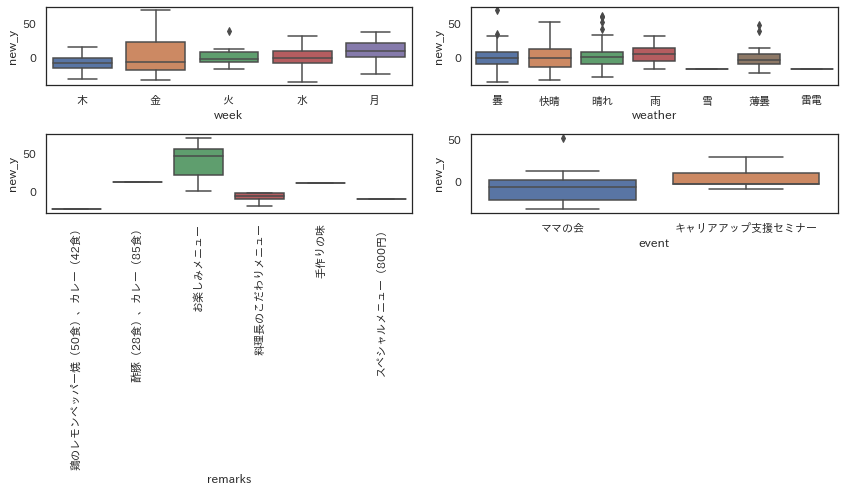

In [12]:
fig, ax = plt.subplots(2,2, figsize=(12,7))
sns.boxplot(x="week",y="new_y",data=train,ax=ax[0][0])
sns.boxplot(x="weather",y="new_y",data=train,ax=ax[0][1])
sns.boxplot(x="remarks",y="new_y",data=train,ax=ax[1][0])
ax[1][0].set_xticklabels(ax[1][0].get_xticklabels(),rotation=90)
sns.boxplot(x="event",y="new_y",data=train,ax=ax[1][1])
plt.tight_layout()

曜日による影響を見る　→　外れ値の影響を避けるため、中央値でエンコーディング

week
月    7.854857
木   -8.968653
水   -1.908993
火   -3.708110
金   -8.816003
Name: new_y, dtype: float64


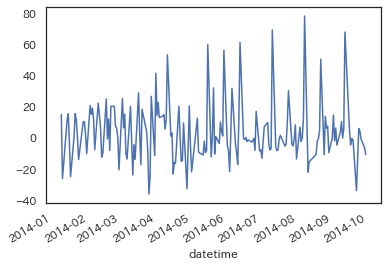

In [13]:
week_encoded=train.groupby('week').new_y.median()
train['week_encoded']=train.week.replace(week_encoded)
print(week_encoded)
#曜日の影響を除去したyを作る
train['new_new_y']=train.new_y-train.week_encoded
train.new_new_y.plot()

お楽しみメニューか否かを特徴量として取り出す

In [14]:
train['fun'] = train.remarks.apply(lambda x: 1 if x=="お楽しみメニュー" else 0)

スパイク日の傾向　→　カレーが大人気

In [15]:
train[(train.new_new_y>40)]

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,id,new_y,month,day,week_encoded,new_new_y,fun
datetime,,,,,,,,,,,,,,,,,,,
2014-04-01,2014-4-1,125,火,1,メンチカツ,377.0,NaN,NaN,NaN,薄曇,--,16.1,55,37.925737,4,1,-3.708110,41.633846,0
2014-04-11,2014-4-11,128,金,1,チキンカレー,NaN,お楽しみメニュー,NaN,NaN,快晴,--,16.5,63,44.608357,4,11,-8.816003,53.424360,1
2014-05-16,2014-5-16,126,金,0,ポークカレー,NaN,お楽しみメニュー,ママの会,NaN,快晴,--,23.8,85,51.264840,5,16,-8.816003,60.080843,1
2014-05-30,2014-5-30,119,金,0,チキンカレー,NaN,お楽しみメニュー,NaN,NaN,薄曇,--,26.9,95,47.580266,5,30,-8.816003,56.396269,1
2014-06-13,2014-6-13,121,金,0,キーマカレー,NaN,お楽しみメニュー,NaN,NaN,晴れ,--,29.5,105,52.562481,6,13,-8.816003,61.378485,1
2014-07-11,2014-7-11,124,金,0,ポークカレー,NaN,お楽しみメニュー,NaN,NaN,晴れ,--,33.9,125,60.657871,7,11,-8.816003,69.473875,1
2014-08-08,2014-8-8,129,金,0,チキンカレー,NaN,お楽しみメニュー,NaN,1.0,曇,--,31.1,144,69.594473,8,8,-8.816003,78.410476,1
2014-08-22,2014-8-22,100,金,1,ロコモコ丼,NaN,お楽しみメニュー,NaN,NaN,晴れ,--,33.1,151,41.856395,8,22,-8.816003,50.672398,1
2014-09-12,2014-9-12,115,金,0,ポークカレー,NaN,お楽しみメニュー,NaN,NaN,晴れ,--,27.3,166,59.265094,9,12,-8.816003,68.081098,1


In [16]:
train['curry'] = train.name.apply(lambda x: 1 if x.find("カレー")>=0 else 0)
train['curry'].value_counts()

0    161
1     16
Name: curry, dtype: int64

メニュー毎の傾向を見る

{'牛丼', '酢豚orカレー', '鶏のピリ辛焼き', 'チキンカレー', 'ポークハヤシ', 'ロコモコ丼', 'キーマカレー', '海老クリーミ―クノーデル', 'サバ焼味噌掛け', 'ポークカレー', '鶏の親子煮', 'ハンバーグカレーソース', 'チーズハンバーグ', 'ひやしたぬきうどん・炊き込みご飯', 'さんま辛味焼', 'さわら焼味噌掛け', '鶏の唐揚げおろしソース', '牛肉筍煮', '豚味噌メンチカツ'}
{'手作りひれかつ', 'チャプチェ', '肉団子クリームシチュー', 'ビーフカレー', '鶏の天ぷら', '筑前煮', '厚切ハムカツ', '越冬キャベツのメンチカツ', 'たっぷりベーコンフライ', 'サーモンフライ・タルタル', 'ロース甘味噌焼き', '牛丼風煮'}


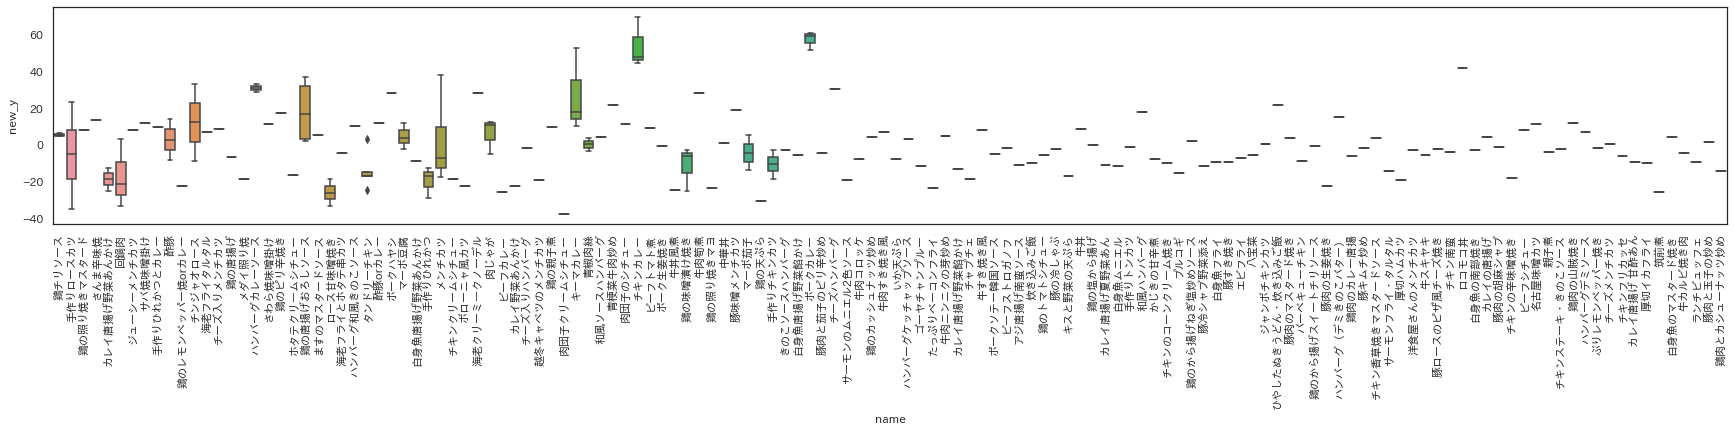

In [17]:
plt.figure(figsize=(30,4))
sns.boxplot(x='name', y='new_y', data=train)
plt.xticks(rotation=90)
#メニュー毎の販売数の中央値をとる
name_encoded=train.groupby('name').new_new_y.median()
train['name_encoded']=train.name.replace(name_encoded)
#販売数の多いを抽出（人気メニュー）
popular_menu=set(train[train.name_encoded>15].name)
#popular_menu=set(train[(train.name_encoded>15)|(train.soldout==1)].name)
train['popular']=train.name.apply(lambda x: 1 if x in popular_menu else 0)
print(popular_menu)
#販売数の少ないを抽出（不人気メニュー）　
unpopular_menu=set(train[train['name_encoded']<-15].name)
#unpopular_menu=set(train[(train.name_encoded<-15)&(train.soldout!=1)].name)
train['unpopular']=train.name.apply(lambda x: 1 if x in unpopular_menu else 0)
print(unpopular_menu)

欠損値を補完

In [18]:
#kcal
train.kcal=train.kcal.fillna(train.kcal.mean())
#payday
train.payday=train.payday.fillna(0)
#event
train["event"] = train["event"].fillna("-")
#remarks
train["remarks"] = train["remarks"].fillna("-")

train.isnull().sum()

datetime         0
y                0
week             0
soldout          0
name             0
kcal             0
remarks          0
event            0
payday           0
weather          0
precipitation    0
temperature      0
id               0
new_y            0
month            0
day              0
week_encoded     0
new_new_y        0
fun              0
curry            0
name_encoded     0
popular          0
unpopular        0
dtype: int64

ヒートマップで相関を確認　→　トレンドを除去したnew_yはより顕著に特徴がでている

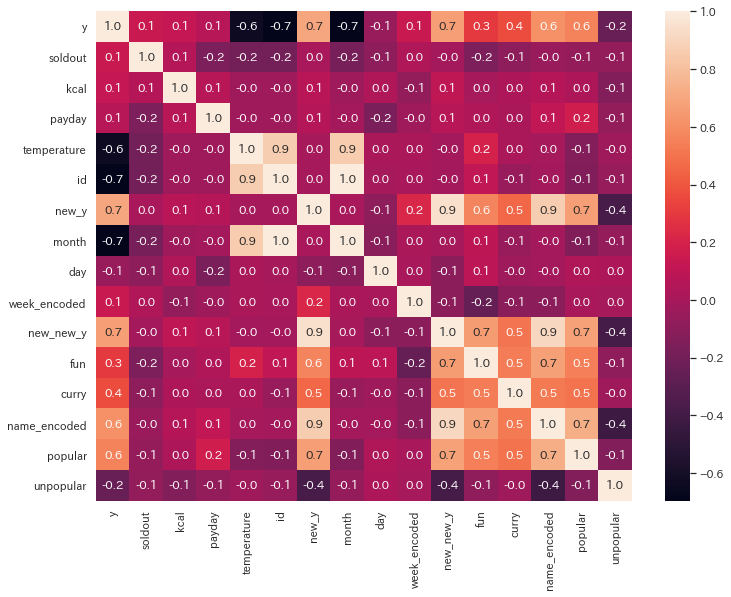

In [19]:
fig, ax = plt.subplots(figsize=(12, 9)) 
sns.heatmap(train.corr(), annot=True, fmt='.1f')

ペアプロットで相関を確認

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


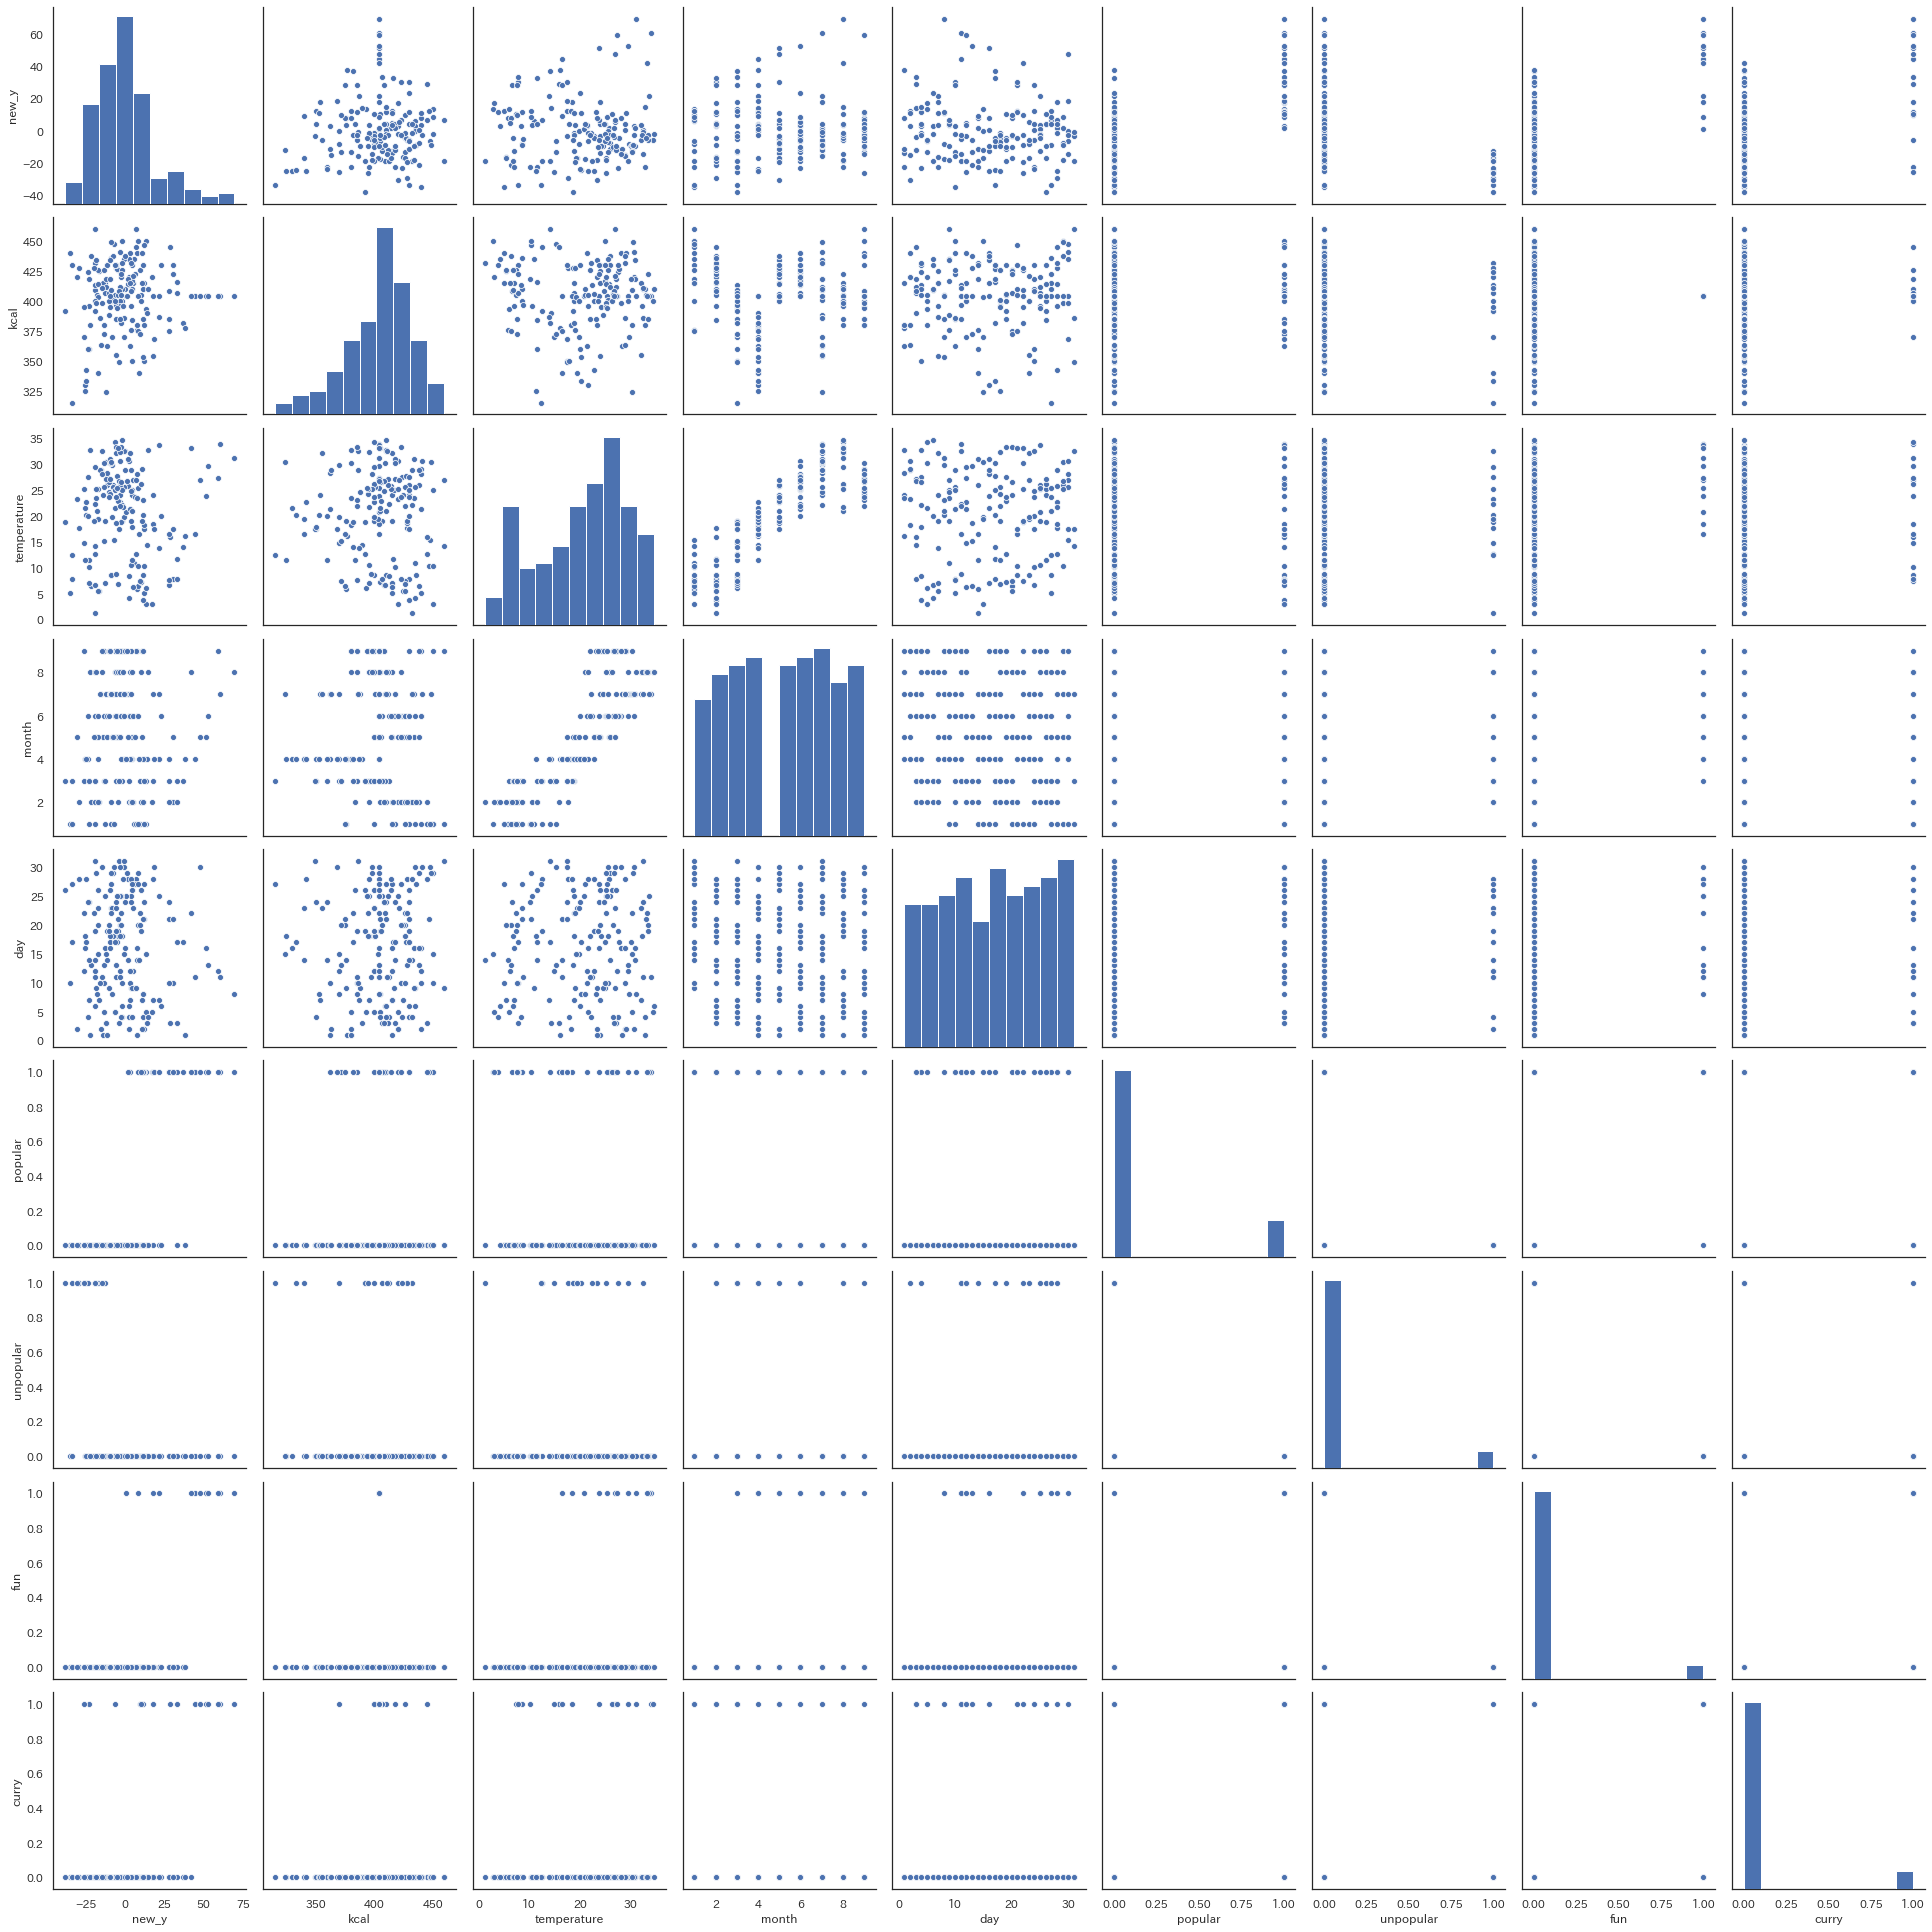

In [20]:
cols = ['new_y', 'kcal', 'temperature', 'month', 'day', 'popular', 'unpopular', 'fun', 'curry'] 
sns.pairplot(train[cols], size=3)
plt.tight_layout();

特徴選択　→　RandomForest系の学習器を用いて重要度を算出し、選択する

            soldout   kcal  payday  temperature  month  day  week_encoded  \
datetime                                                                    
2014-01-09        1  435.0     0.0         10.9      1    9     -8.968653   
2014-01-10        0  440.0     1.0          5.1      1   10     -8.816003   
2014-01-14        1  376.0     0.0          5.8      1   14     -3.708110   
2014-01-15        0  450.0     0.0          2.9      1   15     -1.908993   
2014-01-16        0  415.0     0.0          7.0      1   16     -8.968653   

            fun  curry  name_encoded  popular  unpopular  
datetime                                                  
2014-01-09    0      0     10.694511        0          0  
2014-01-10    0      0      3.802139        0          0  
2014-01-14    0      0     11.498734        0          0  
2014-01-15    0      0     15.536839        1          0  
2014-01-16    0      0    -13.377627        0          0  


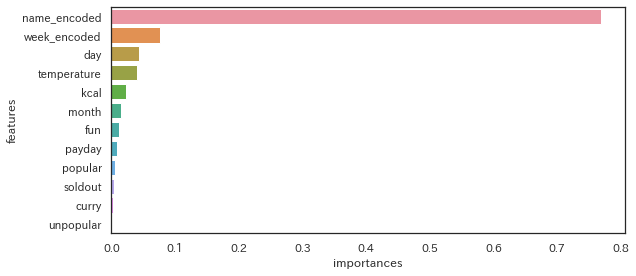

In [21]:
from sklearn.ensemble import RandomForestRegressor as RFR
#学習データの作成　→　Object列と不要な列を落とす
trainX=train.select_dtypes(include=['int64', 'float64']).drop(['y','new_y','new_new_y','id'],axis=1)
trainY=train.new_y
print(trainX.head())
#学習実行
model=RFR(n_estimators=1000)
model.fit(trainX,trainY)
#重要度を可視化
fi = model.feature_importances_
importances = pd.DataFrame({"features":trainX.columns.values, "importances" : fi})
plt.figure(figsize=(9, 4))
sns.barplot(x="importances", y="features", data=importances.sort_values(by="importances", ascending=False))
plt.tight_layout()

目的変数の決定　→　soldout入れるとLightGBMはかなり良くなるが、過学習

In [22]:
#target_cols=['name_encoded','week_encoded','temperature','day','kcal','month','fun','payday','soldout','popular','curry']
target_cols=['name_encoded','week_encoded','temperature','day','kcal','month','fun','payday']
trainX=train[target_cols]

モデルの作成（LinearRegression）

In [23]:
from sklearn.linear_model import LinearRegression as LR
modelLR=LR()
modelLR.fit(trainX, trainY)
print(modelLR.coef_)
print(modelLR.intercept_)

[ 0.92836489  1.06134087 -0.17633846 -0.21982832  0.03645296  0.46723699
  8.9470584  -3.94356658]
-9.612873448564494


モデルの作成（LightGBM）　→　色々試した結果、LightGBM>重回帰>SVM>決定木>ランダムフォレストとなった

In [24]:
import optuna.integration.lightgbm as lightgbm_tuner
import lightgbm as lgb
from sklearn.model_selection import train_test_split
#データ準備
x_train, x_test, y_train, y_test = train_test_split(trainX, trainY)
trainLGBM=lightgbm_tuner.Dataset(x_train, y_train)
testLGBM=lightgbm_tuner.Dataset(x_test, y_test)
#学習実行
params={"objective":"regression","metric":"rmse"}
best_params, tuning_history = dict(), list()
modelLGBM=lightgbm_tuner.train(params, trainLGBM, valid_sets=testLGBM,
                             verbose_eval=0,
                             num_boost_round=1000,
                             early_stopping_rounds=100,
                             best_params=best_params,
                             tuning_history=tuning_history)

C:\Anaconda3\lib\site-packages\optuna\_experimental.py:90: ExperimentalWarning: train is experimental (supported from v0.18.0). The interface can change in the future.
  ExperimentalWarning,
tune_num_leaves, val_score: 11.059645: 100%|###########################################| 20/20 [00:08<00:00,  2.38it/s]


tune_bagging_fraction_and_bagging_freq, val_score: 11.059645:  10%|##1                  | 1/10 [00:00<00:03,  2.73it/s][I 2020-05-12 21:11:13,578] Finished trial#0 with value: 11.63376709049057 with parameters: {'bagging_fraction': 0.6660798033936617, 'bagging_freq': 7}. Best is trial#0 with value: 11.63376709049057.
tune_bagging_fraction_and_bagging_freq, val_score: 11.059645:  20%|####2                | 2/10 [00:00<00:02,  2.76it/s][I 2020-05-12 21:11:13,933] Finished trial#1 with value: 11.454349292534857 with parameters: {'bagging_fraction': 0.647633577468419, 'bagging_freq': 5}. Best is trial#1 with value: 11.454349292534857.
tune_bagging_fraction_and_bagging_freq, val_score: 11.059645:  30%|######3              | 3/10 [00:01<00:02,  2.56it/s][I 2020-05-12 21:11:14,391] Finished trial#2 with value: 11.202867972125933 with parameters: {'bagging_fraction': 0.9588050615525763, 'bagging_freq': 3}. Best is trial#2 with value: 11.202867972125933.
tune_bagging_fraction_and_bagging_freq, 

tune_lambda_l1_and_lambda_l2, val_score: 10.888124:  50%|###############               | 10/20 [00:03<00:03,  3.18it/s][I 2020-05-12 21:11:24,814] Finished trial#9 with value: 10.978522070383931 with parameters: {'lambda_l1': 1.898538845591764e-05, 'lambda_l2': 0.6868464475240752}. Best is trial#1 with value: 10.888123653362726.
tune_lambda_l1_and_lambda_l2, val_score: 10.888124:  55%|################5             | 11/20 [00:03<00:02,  3.32it/s][I 2020-05-12 21:11:25,092] Finished trial#10 with value: 11.059691816947163 with parameters: {'lambda_l1': 0.004401715841819279, 'lambda_l2': 0.0006938721984558829}. Best is trial#1 with value: 10.888123653362726.
tune_lambda_l1_and_lambda_l2, val_score: 10.888124:  60%|##################            | 12/20 [00:04<00:02,  3.16it/s][I 2020-05-12 21:11:25,442] Finished trial#11 with value: 11.150540157124345 with parameters: {'lambda_l1': 1.3202417384897965e-06, 'lambda_l2': 6.619294245863013}. Best is trial#1 with value: 10.888123653362726.
tun

{'lambda_l1': 0.0001642985845372726, 'lambda_l2': 2.2666812383596557, 'num_leaves': 31, 'feature_fraction': 0.6, 'bagging_fraction': 1.0, 'bagging_freq': 0, 'min_child_samples': 5}


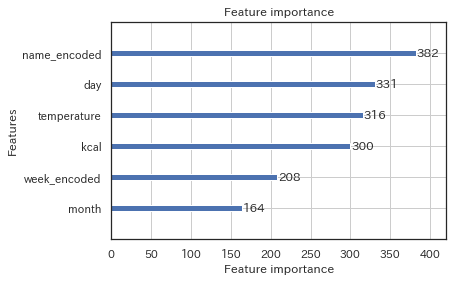

In [25]:
print(best_params)
#{'lambda_l1': 9.706263837064287e-05, 'lambda_l2': 0.013019382695190861, 'num_leaves': 31, 'feature_fraction': 0.5, 'bagging_fraction': 1.0, 'bagging_freq': 0, 'min_child_samples': 10}
lgb.plot_importance(modelLGBM)

学習データの予測結果評価

*pred_LR
score RMSE 7.060603492208302
score R2 0.9320463830375868
*pred_LGBM
score RMSE 5.020919193411336
score R2 0.9656366579304003
['name_encoded', 'week_encoded', 'temperature', 'day', 'kcal', 'month', 'fun', 'payday']


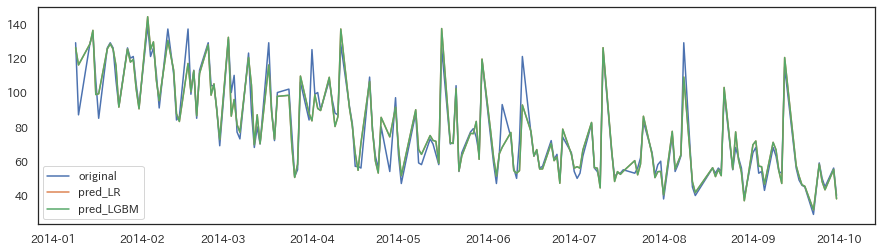

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

plt.figure(figsize=(15,4))
plt.plot(train.y, label='original')

train['pred_LR']=modelLR.predict(trainX)+y_reg
print('*pred_LR')
print("score RMSE", np.sqrt(mean_squared_error(train.y, train.pred_LR)))
print("score R2", r2_score(train.y, train.pred_LR))
plt.plot(train.pred_LR, label='pred_LR')

train['pred_LGBM']=modelLGBM.predict(trainX)+y_reg
print('*pred_LGBM')
print("score RMSE", np.sqrt(mean_squared_error(train.y, train.pred_LGBM)))
print("score R2", r2_score(train.y, train.pred_LGBM))
plt.plot(train.pred_LR, label='pred_LGBM')

plt.legend(loc='best')
print(target_cols)

trainにあってtestにないメニュー

In [27]:
test['unknown_menu'] = test['name'].apply(lambda x : 0 if x in name_encoded else 1)
test[test.unknown_menu==1].name

3               麻婆春雨
4           厚揚げ肉みそ炒め
5       完熟トマトのホットカレー
8            若鶏梅肉包揚げ
9            ミックスグリル
10        豚肉と白菜の中華炒め
11              ヒレカツ
12               豚柳川
14              麻婆豆腐
16              唐揚げ丼
17             マス塩焼き
20       鶏肉と野菜の黒胡椒炒め
23             ハンバーグ
24      彩り野菜と鶏肉の黒酢あん
27     ポークのバーベキューソテー
28            鶏肉の唐揚げ
29           白身魚味噌焼き
30        エビフライ・エビカツ
31        野菜ごろごろシチュー
32              麻婆豆腐
33    ベルギー風チキンのクリーム煮
34            スタミナ炒め
36       なすと挽肉のはさみ揚げ
37           鶏肉の治部煮風
38               牛丼風
39      鶏肉のスイートチリソース
Name: name, dtype: object

テストデータの前処理

In [28]:
#欠損値補完
test['kcal']=test.kcal.fillna(train.kcal.mean())
test['payday']=test.payday.fillna(0)
#月と日に分割
test["month"] = test.datetime.apply(lambda x : int(x.split("-")[1]))
test["day"] = test.datetime.apply(lambda x : int(x.split("-")[2]))
#trainにないメニューを未知メニューに変換
name_encoded.loc['unknown_menu']=train.name_encoded.median()
test['name'] = test['name'].apply(lambda x : x if x in name_encoded else 'unknown_menu')
#メニューを販売数の中央値に変換
test['name_encoded'] = test['name'].replace(name_encoded)
#曜日を販売数の中央値に変換
test['week_encoded'] = test['week'].replace(week_encoded)
#お楽しみメニュー、人気メニュー、不人気メニューでフラグ付け
test['fun'] = test['remarks'].apply(lambda x : 1 if x == 'お楽しみメニュー' else 0)
test['popular'] = test['name'].apply(lambda x : 1 if x in popular_menu else 0)
test['unpopular'] = test['name'].apply(lambda x : 1 if x in unpopular_menu else 0)
#カレーフラグを追加
test['curry'] = test.name.apply(lambda x: 1 if x.find("カレー")>=0 else 0)
#目的変数の選択
testX=test[target_cols]
testX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 8 columns):
name_encoded    40 non-null float64
week_encoded    40 non-null float64
temperature     40 non-null float64
day             40 non-null int64
kcal            40 non-null float64
month           40 non-null int64
fun             40 non-null int64
payday          40 non-null float64
dtypes: float64(5), int64(3)
memory usage: 2.6 KB


trainの最終日とtestの開始日の差を加味してトレンド（予測）算出

2014-9-9 2014-10-1


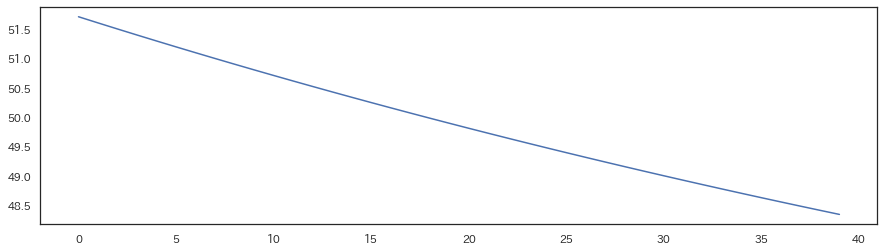

In [29]:
print(train.datetime.max(), test.datetime.min())
day_dif=(pd.to_datetime(test.datetime.min())-pd.to_datetime(train.datetime.max())).days
test['id'] = test.index + train.id.max() + day_dif
xs = test.id.values
test_y_reg = a1 * np.exp(-b1 * xs) + c1
plt.figure(figsize=(15,4))
plt.plot(test_y_reg)

テストデータで予測をおこない、SIGNATE提出用データ作成　→　予測結果にトレンドを足し算

In [30]:
test['pred']=modelLGBM.predict(testX)+test_y_reg
#test['pred']=modelLR.predict(testX)+test_y_reg

sample=pd.read_csv("sample.csv", header=None)
sample[1]=test.pred
sample.to_csv("submit_obento_lgbm.csv", index=None, header=None)
sample.head()

,0,1
0,2014-10-1,55.030681
1,2014-10-2,45.014956
2,2014-10-3,44.489602
3,2014-10-6,56.884161
4,2014-10-7,50.335226
